In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
PATH = '../data/'
df = pd.read_csv(PATH + 'raw_data.csv')
df

,IMAGE_VERSION_1,IMAGE_VERSION_2,IMAGE_VERSION_3
0,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
1,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
2,https://static.zara.net/photos///2024/V/0/1/p/...,https://static.zara.net/photos///2024/V/0/1/p/...,https://static.zara.net/photos///2024/V/0/1/p/...
3,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...
4,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...,https://static.zara.net/photos///2024/V/0/2/p/...
...,...,...,...
49313,https://static.zara.net/photos///2021/I/4/1/p/...,https://static.zara.net/photos///2021/I/4/1/p/...,NaN
49314,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...
49315,https://static.zara.net/photos///2024/V/1/3/p/...,https://static.zara.net/photos///2024/V/1/3/p/...,https://static.zara.net/photos///2024/V/1/3/p/...
49316,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...,https://static.zara.net/photos///2024/V/0/3/p/...


In [ ]:
ROWS = df.shape[0]
COLS = df.shape[1]

In [ ]:
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt


In [ ]:
def get_image(URL):
    request = requests.get(URL)
    img = Image.open(BytesIO(request.content))
    return img

In [ ]:
url = df.iloc[7, 2]


In [ ]:
images = []
for i in range(3):
    for j in range(COLS):
        url = df.iloc[i, j]
        if pd.isna(url):
            continue
        image = get_image(url)
        images.append(image.resize((64,64)))

In [ ]:
def showfoto(x):
    img = Image.fromarray(x)
    plt.figure(figsize=(8, 6))  # Example: 8 inches wide by 6 inches tall

    # Display the image using `matplotlib`
    plt.imshow(img)
    plt.axis('off')  # Optional: Hide the axis labels for a cleaner display
    plt.show()

Image shape: (64, 64, 3)
[[[234 235 239]
  [234 234 239]
  [233 234 238]
  ...
  [226 229 234]
  [226 229 234]
  [225 229 234]]

 [[234 235 238]
  [234 235 239]
  [233 234 238]
  ...
  [226 230 234]
  [225 230 234]
  [225 230 234]]

 [[235 236 237]
  [234 235 237]
  [234 235 238]
  ...
  [226 230 234]
  [226 229 234]
  [226 229 234]]

 ...

 [[232 230 225]
  [231 230 225]
  [231 230 225]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]

 [[232 230 225]
  [231 230 225]
  [231 230 225]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]

 [[230 229 224]
  [230 229 224]
  [230 229 224]
  ...
  [227 226 221]
  [227 226 221]
  [227 226 221]]]
Image shape: (64, 64, 3)
[[[233 234 238]
  [233 234 238]
  [233 234 238]
  ...
  [224 228 233]
  [223 228 232]
  [224 227 232]]

 [[233 234 236]
  [233 234 237]
  [233 234 238]
  ...
  [224 229 233]
  [224 229 233]
  [224 228 233]]

 [[234 235 237]
  [234 235 237]
  [233 234 236]
  ...
  [226 229 234]
  [225 229 234]
  [224 229 233]]

 ...

 [

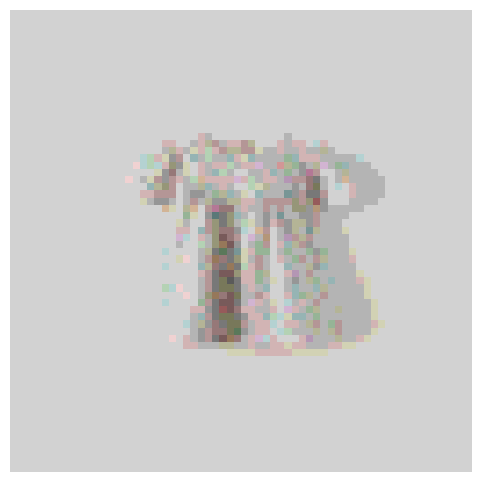

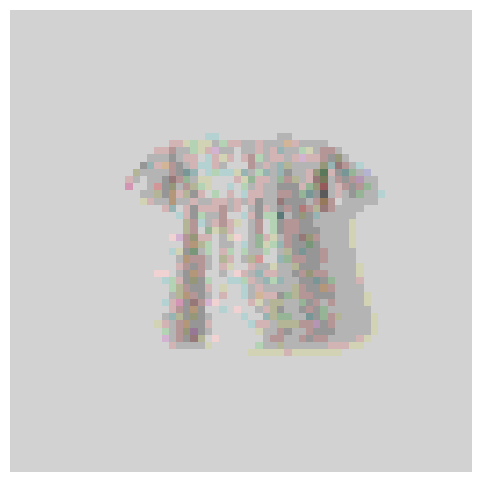

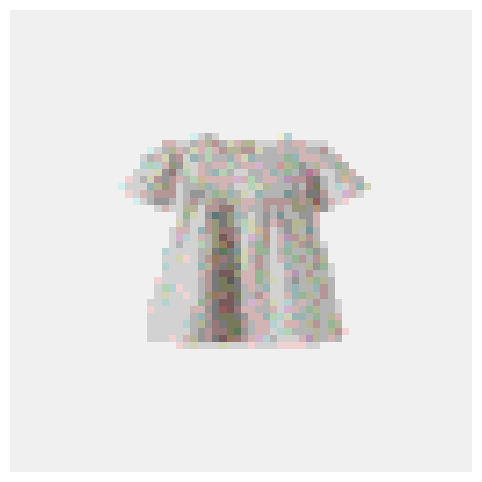

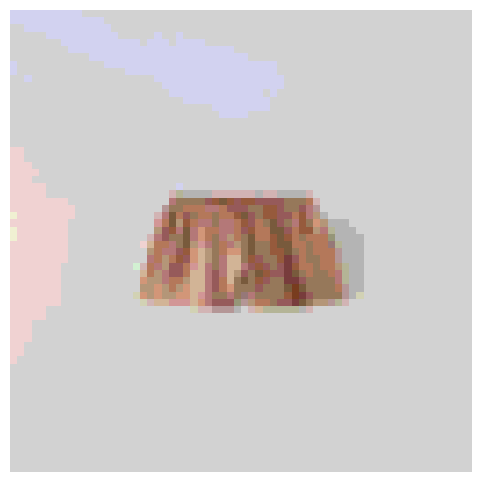

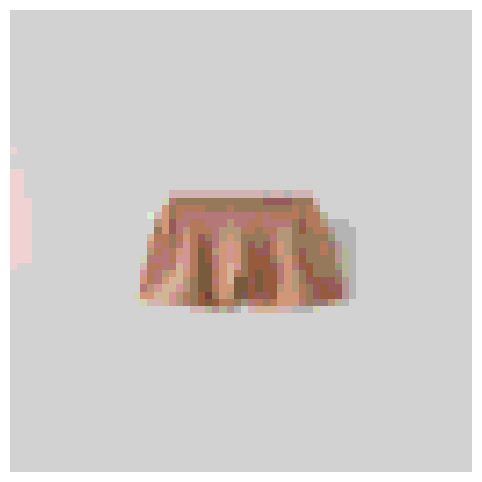

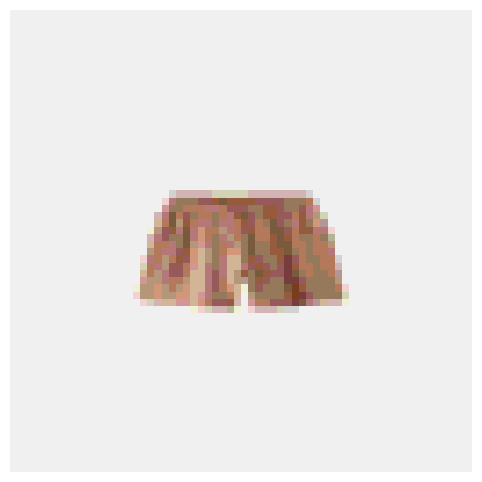

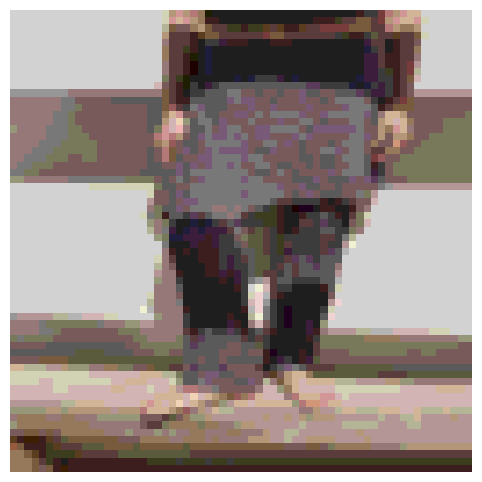

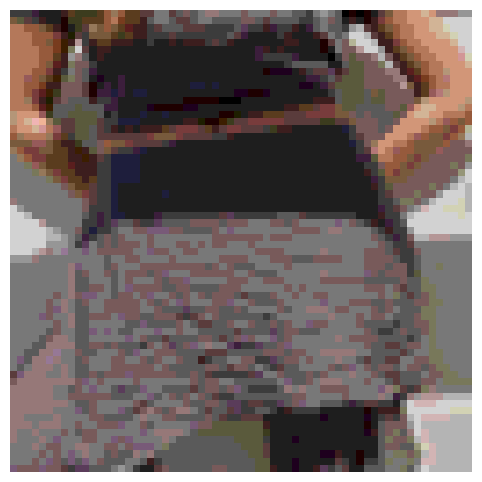

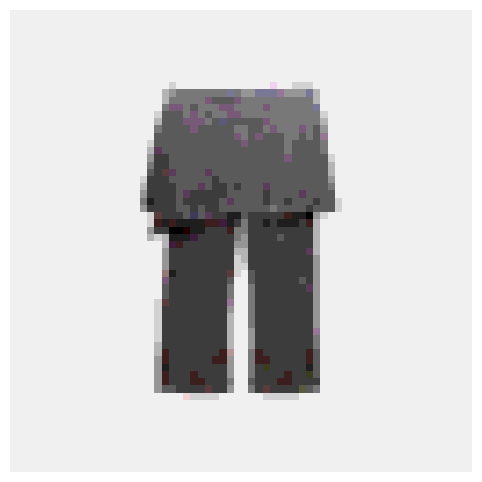

In [ ]:
images2 = []
for x in images:

    # Convert the image data to a NumPy array
    img_array = np.array(x)

    # Display the shape and data of the resulting array
    print(f"Image shape: {img_array.shape}")
    print(img_array)
    images2.append(img_array)

for x in images2:
    x//=30
    x*=30

    showfoto(x)


In [ ]:
images = []

In [ ]:
def take_batch(start, end):
    for i in range(start, min(end, urls.shape[0])):
        for j in range(urls.iloc[i].shape[0]):
            url = urls.iloc[i][j]

            print(i, j, url)

            if type(url) != str:
                continue

            try:
                data = requests.get(url).content

                f = open(f'{i}_{j}','wb')
                f.write(data)
                f.close()

                img = Image.open(f"{i}_{j}")
                images.append(np.array(img.resize((128,128))))

            except Image.UnidentifiedImageError:
                continue


def display_row(index):
    images = []
    for i in range(3):
        try:
            image = mpimg.imread(f"{index}_{i}")
            images.append(image.resize((128,128)))
        except:
            continue

    num = len(images)

    f, axarr = plt.subplots(1, num)

    for i in range(num):
        axarr[i].imshow(images[i])
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

In [ ]:
urls = pd.read_csv("../data/raw_data.csv")

take_batch(1,10)

C:\Users\Bernat\AppData\Local\Temp\ipykernel_41520\157176464.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = urls.iloc[i][j]


1 0 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_1_1.jpg?ts=1710428896326
1 1 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_2_1.jpg?ts=1710428896373
1 2 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_3_1_1.jpg?ts=1710428894764
2 0 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_1_1_1.jpg?ts=1713965800221
2 1 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_2_1_1.jpg?ts=1713965805677
2 2 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/2/w/2048/2893010818_3_1_1.jpg?ts=1708506892071
3 0 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_6_1_1.jpg?ts=1710489196217
3 1 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_6_2_1.jpg?ts=1710489196510
3 2 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_3_1_1.jpg?ts=1710489197564
4 0 http

In [ ]:
images[0].shape
import math

In [ ]:
def computehist(x):
    rgbhistogram = [[[0 for _ in range(16)] for __ in range(16)] for ___ in range(16)]
    for i in range(len(x)):
        for j in range(len(x[0])):
            rgbhistogram[x[i][j][0]//16][x[i][j][1]//16][x[i][j][2]//16] += 1
    return rgbhistogram

def distt2(x,y):
    mxx = 0
    mxy = 0
    for i in x:
        for j in i:
            for k in j:
                mxx = max(mxx,k)
    for i in y:
        for j in i:
            for k in j:
                mxy = max(mxy,k)
    cnt = 0.0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                if x[i][j][k]!=mxx and y[i][j][k]!=mxy:
                    cnt+=abs((x[i][j][k]+1)-(y[i][j][k]+1))
    return cnt

def distt(x,y):
    mxx = 0
    mxy = 0
    for i in x:
        for j in i:
            for k in j:
                mxx = max(mxx,k)
    for i in y:
        for j in i:
            for k in j:
                mxy = max(mxy,k)
    cnt = 0.0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                if x[i][j][k]!=mxx and y[i][j][k]!=mxy:
                    cnt+=abs(math.log(x[i][j][k]+1)-math.log(y[i][j][k]+1))
    return cnt
def distt3(x,y):
    cnt = 0.0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):
                cnt+=abs(math.log(x[i][j][k]+1)-math.log(y[i][j][k]+1))
    return cnt
def dist2(x,y):
    cnt = 0.0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):

                 for i2 in range(-4,5):
                    for j2 in range(-4,5):
                        for k2 in range(-4,5):
                            d1 = i2*i2+j2*j2+k2*j2
                            if i+i2 in range(len(x)) and j+j2 in range(len(x[0])) and k+k2 in range(len(x[0][0])):
                                if(d1<100 and d1>0):
                                    cnt+=1/d1 * abs(math.log(x[i][j][k]+1)-math.log(y[i+i2][j+j2][k+k2]+1))
    return cnt
def dist3(x,y):
    cnt = 0.0
    for i in range(len(x)):
        for j in range(len(x[0])):
            for k in range(len(x[0][0])):

                 for i2 in range(-1,2):
                    for j2 in range(-1,2):
                        for k2 in range(-1,2):
                            d1 = i2*i2+j2*j2+k2*j2
                            if i+i2 in range(len(x)) and j+j2 in range(len(x[0])) and k+k2 in range(len(x[0][0])):
                                if(d1<9 and d1>0):
                                    cnt+=x[i][j][k]*y[i+i2][j+j2][k+k2]
    return cnt

311.3107305398897


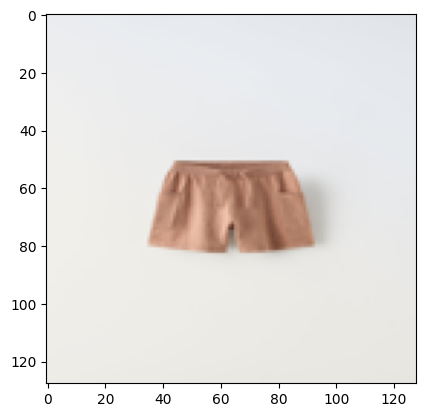

290.8016235347535


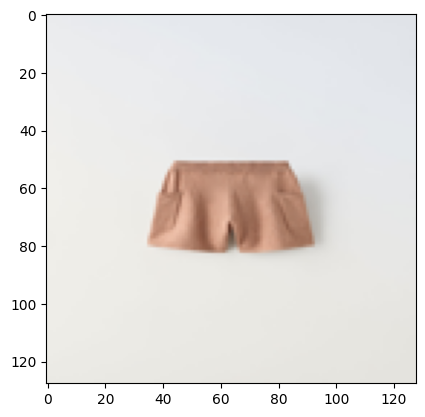

277.0334734960176


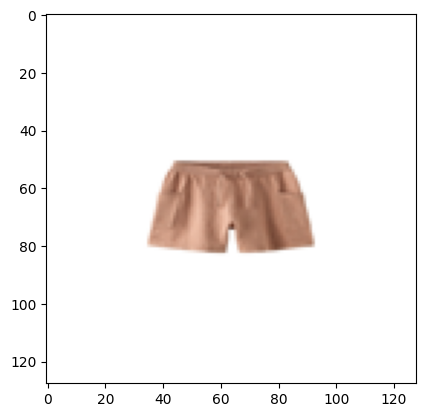

426.8118743687938


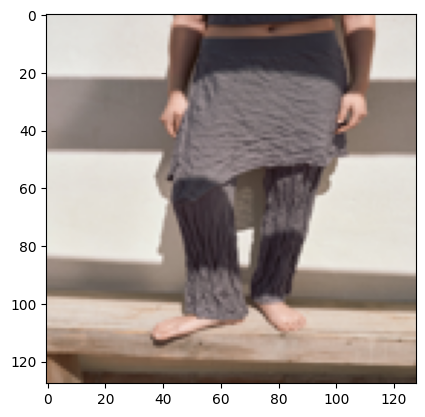

367.0220167399073


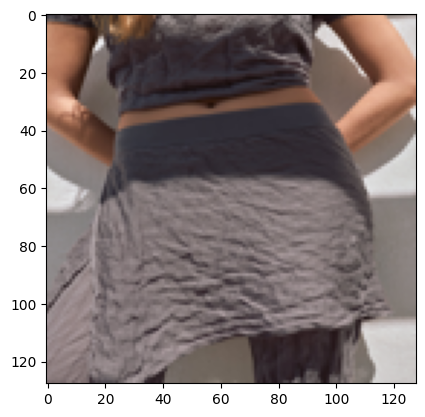

0.0


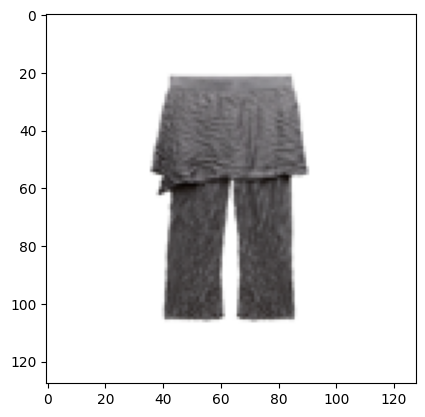

159.635896830099


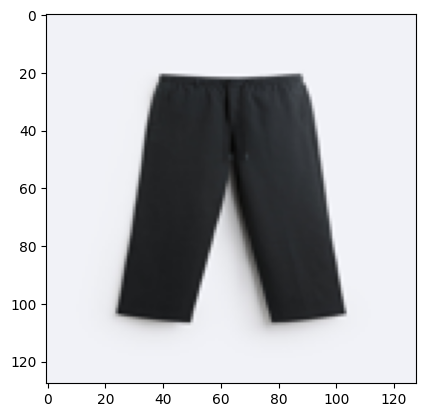

167.97383308061228


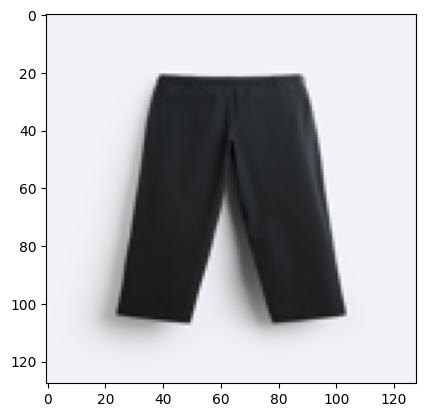

145.71560628777252


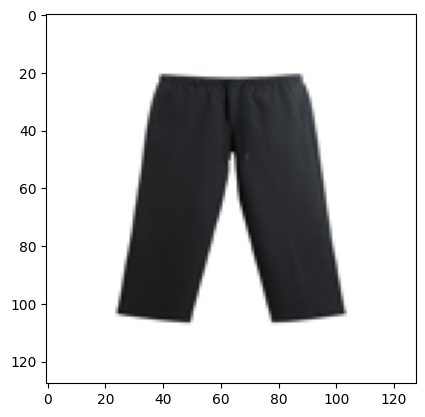

150.31646565969828


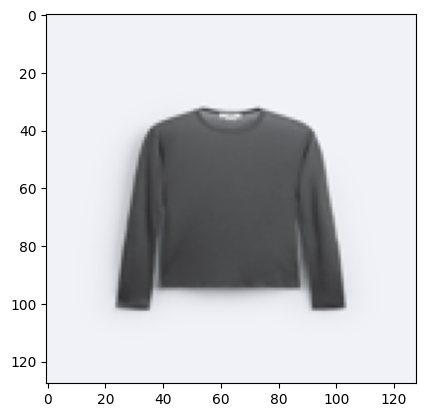

150.61099758545043


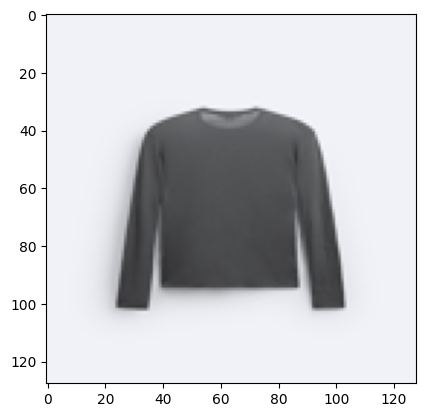

113.92783399905507


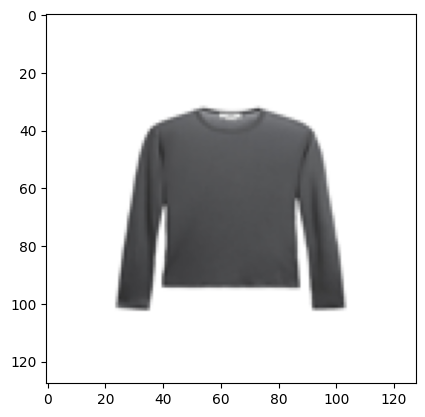

248.27794830867188


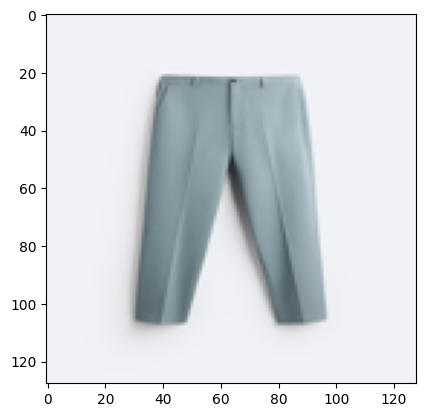

243.68100065611586


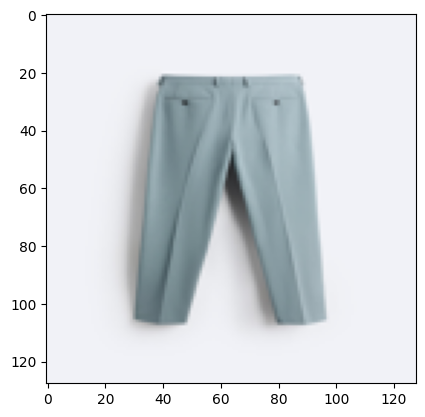

246.79946587570583


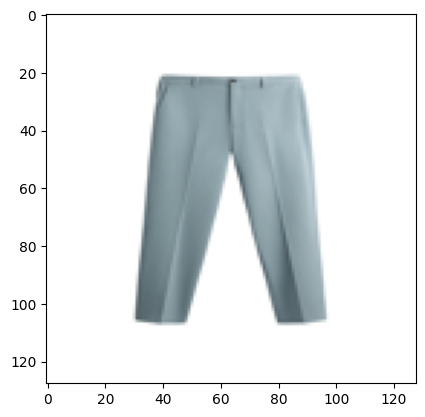

356.9850594666408


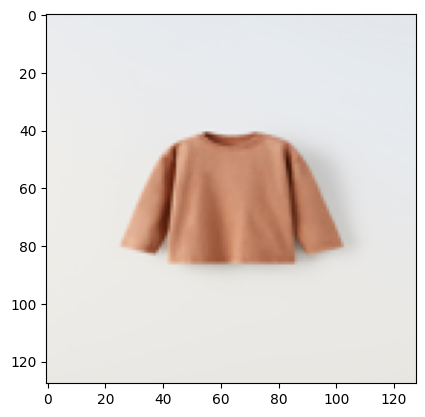

349.4277748682368


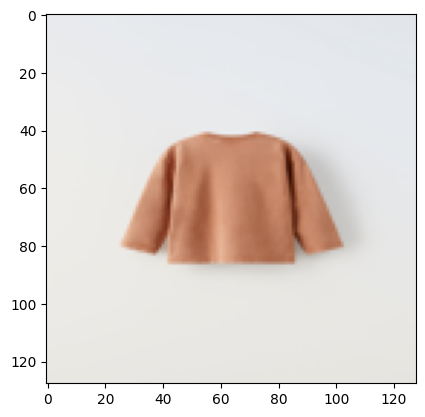

326.80907575679555


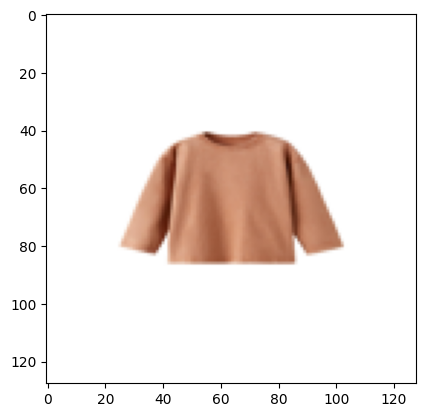

192.9859399584431


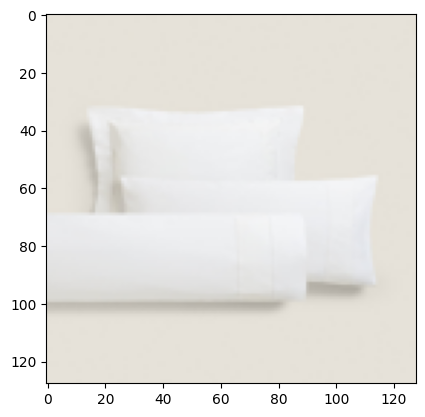

188.0948966136051


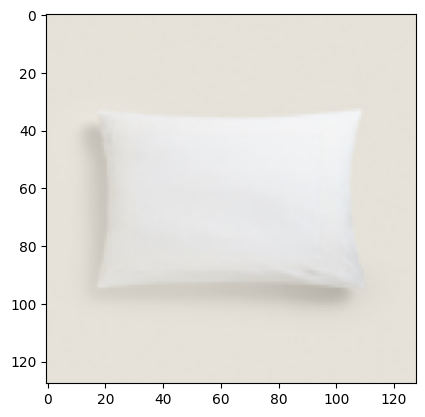

652.1809881613857


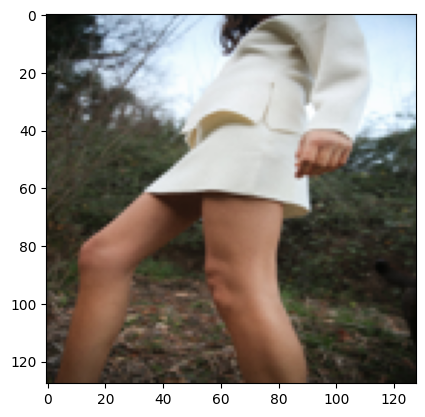

118.05438821886234


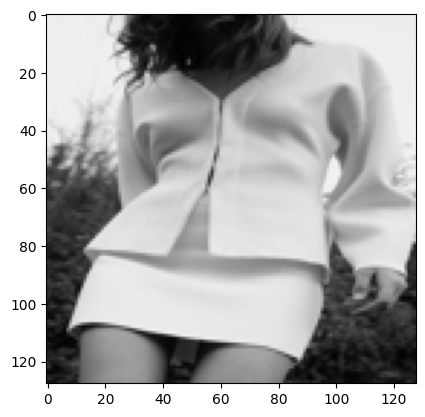

156.00302626626603


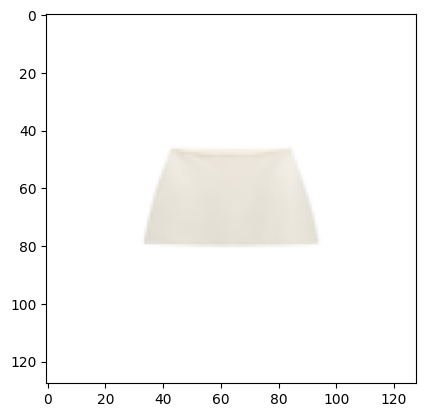

211.05254906634605


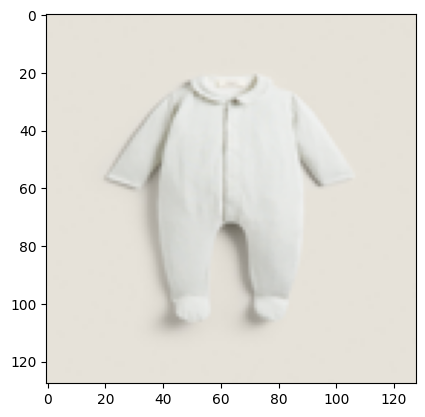

250.33282275198164


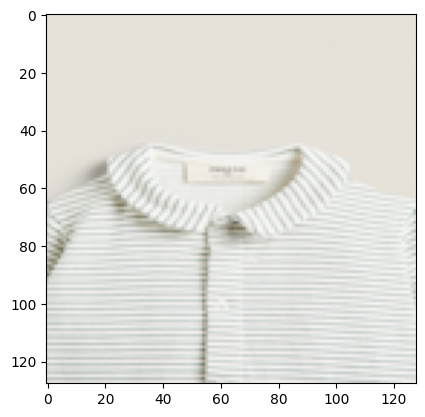

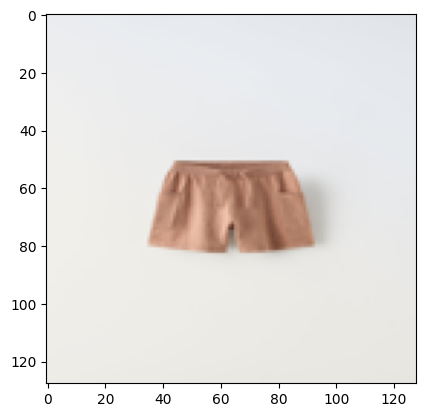

In [ ]:
cnt = 0

rgbhists = []

rgbhists.append(computehist(images[5]))
# 64 x 64
for x in images:

    rgbhists.append(computehist(x))
    print(distt3(rgbhists[-1],rgbhists[0]))
    plt.imshow(x)
    plt.show()

plt.imshow(images[0])
plt.show()

In [ ]:
dists = [[distt2(x,y) for x in rgbhists] for y in rgbhists]


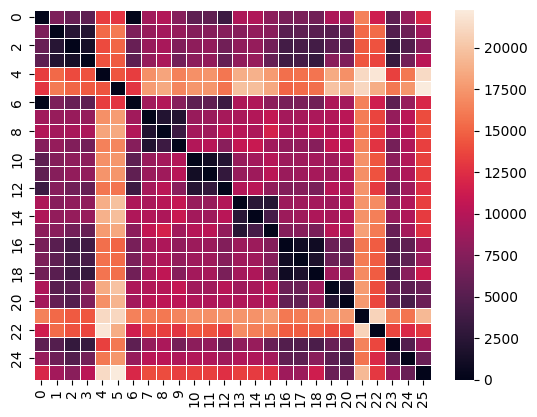

In [ ]:
import seaborn as sns
ax = sns.heatmap(dists,linewidth=0.5)
plt.show()

import random

In [ ]:
import random
K = 100
J = 3
def read(url):

    x = np.array(get_image(url).resize((128,128)))
    return x
def solve(url):
    x = read(url)

    order = []
    for _ in range(K):
        r = random.randint(0,df.shape[0]-1)
        c = random.randint(0,df.shape[1]-1)
        new_url = df[r][c]
        y = read(new_url)
        order.append([distt2(x,y),new_url])

    order.sort()
    ans = []
    for i in range(3):
        ans.append(order[i][1])
    return ans




In [ ]:
images = []
def take_batch2(start, end):
    for i in range(start, min(end, urls.shape[0])):
        for j in range(urls.iloc[i].shape[0]):
            url = urls.iloc[i][j]

            print(i, j, url)

            if type(url) != str:
                continue

            try:
                #data = requests.get(url).content

                img = get_image(url)
                images.append(np.array(img.resize((128,128))))
                np.save(f'{i}_{j}.npy', images[-1])

            except Image.UnidentifiedImageError:
                continue

In [ ]:
urls = pd.read_csv("../data/raw_data.csv")

take_batch2(333,1000)

C:\Users\Bernat\AppData\Local\Temp\ipykernel_41520\2369599131.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = urls.iloc[i][j]


1 0 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_1_1.jpg?ts=1710428896326
1 1 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_2_1.jpg?ts=1710428896373
1 2 https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_3_1_1.jpg?ts=1710428894764
2 0 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_1_1_1.jpg?ts=1713965800221
2 1 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_2_1_1.jpg?ts=1713965805677
2 2 https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/2/w/2048/2893010818_3_1_1.jpg?ts=1708506892071
3 0 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_6_1_1.jpg?ts=1710489196217
3 1 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_6_2_1.jpg?ts=1710489196510
3 2 https://static.zara.net/photos///2024/V/0/2/p/4432/475/922/2/w/2048/4432475922_3_1_1.jpg?ts=1710489197564
4 0 http

27 1 https://static.zara.net/photos///2024/V/0/2/p/4285/498/401/2/w/2048/4285498401_6_2_1.jpg?ts=1706805340401
27 2 https://static.zara.net/photos///2024/V/0/2/p/4285/498/401/2/w/2048/4285498401_3_1_1.jpg?ts=1706805340629
28 0 https://static.zara.net/photos///2024/V/4/1/p/2361/004/804/2/w/2048/2361004804_6_1_1.jpg?ts=1705048650766
28 1 https://static.zara.net/photos///2024/V/4/1/p/2361/004/804/2/w/2048/2361004804_6_2_1.jpg?ts=1705048650172
28 2 nan
29 0 https://static.zara.net/photos///2024/V/0/3/p/1716/327/621/2/w/2048/1716327621_6_1_1.jpg?ts=1711555021631
29 1 https://static.zara.net/photos///2024/V/0/3/p/1716/327/621/2/w/2048/1716327621_6_2_1.jpg?ts=1711555021509
29 2 https://static.zara.net/photos///2024/V/0/3/p/1716/327/621/2/w/2048/1716327621_3_1_1.jpg?ts=1711555021104
30 0 https://static.zara.net/photos///2024/V/0/1/p/4661/005/800/2/w/2048/4661005800_1_1_1.jpg?ts=1706628794635
30 1 https://static.zara.net/photos///2024/V/0/1/p/4661/005/800/2/w/2048/4661005800_2_1_1.jpg?ts=170662

52 2 https://static.zara.net/photos///2023/I/0/3/p/6048/558/712/2/w/2048/6048558712_3_1_1.jpg?ts=1688464395088
53 0 https://static.zara.net/photos///2023/I/0/3/p/5350/761/712/2/w/2048/5350761712_6_1_1.jpg?ts=1692859991049
53 1 https://static.zara.net/photos///2023/I/0/3/p/5350/761/712/2/w/2048/5350761712_6_2_1.jpg?ts=1692859991524
53 2 https://static.zara.net/photos///2023/I/0/3/p/5350/761/712/2/w/2048/5350761712_3_1_1.jpg?ts=1692859994219
54 0 https://static.zara.net/photos///2024/V/4/1/p/9541/014/250/2/w/2048/9541014250_6_1_1.jpg?ts=1712137067943
54 1 https://static.zara.net/photos///2024/V/4/1/p/9541/014/250/2/w/2048/9541014250_6_2_1.jpg?ts=1712137068324
54 2 nan
55 0 https://static.zara.net/photos///2024/W/1/3/p/6701/130/007/2/w/2048/6701130007_6_1_1.jpg?ts=1705476870009
55 1 https://static.zara.net/photos///2024/W/1/3/p/6701/130/007/2/w/2048/6701130007_6_2_1.jpg?ts=1705476870028
55 2 nan
56 0 https://static.zara.net/photos///2024/V/0/1/p/5862/059/811/2/w/2048/5862059811_1_1_1.jpg?

80 1 https://static.zara.net/photos///2023/I/0/3/p/4428/772/824/2/w/2048/4428772824_6_2_1.jpg?ts=1697447513748
80 2 https://static.zara.net/photos///2023/I/0/3/p/4428/772/824/2/w/2048/4428772824_3_1_1.jpg?ts=1697447513554
81 0 https://static.zara.net/photos///2024/V/0/3/p/5644/874/982/2/w/2400/5644874982_6_1_1.jpg?ts=1713942195557
81 1 https://static.zara.net/photos///2024/V/0/3/p/5644/874/982/2/w/2400/5644874982_6_2_1.jpg?ts=1713942195738
81 2 https://static.zara.net/photos///2024/V/0/3/p/5644/874/982/2/w/2400/5644874982_3_1_1.jpg?ts=1713942170790
82 0 https://static.zara.net/photos///2024/V/1/3/p/1236/330/057/2/w/2048/1236330057_6_1_1.jpg?ts=1708071461967
82 1 https://static.zara.net/photos///2024/V/1/3/p/1236/330/057/2/w/2048/1236330057_6_2_1.jpg?ts=1708071462031
82 2 https://static.zara.net/photos///2024/V/1/3/p/1236/330/057/2/w/2048/1236330057_3_1_1.jpg?ts=1708071461933
83 0 https://static.zara.net/photos///2024/W/1/1/p/1211/110/035/2/w/2048/1211110035_6_1_1.jpg?ts=1703667776374
8

105 1 https://static.zara.net/photos///assets/public/7c49/cef9/f1c44238a43c/ca8d0d4af40e/15455310001-e2/w/2048/15455310001-e2.jpg?ts=1710957669100
105 2 https://static.zara.net/photos///2024/V/1/1/p/5455/310/001/2/w/2048/5455310001_3_1_1.jpg?ts=1710957659680
106 0 https://static.zara.net/photos///2024/V/1/2/p/3620/320/800/2/w/2048/3620320800_6_1_1.jpg?ts=1706801186047
106 1 https://static.zara.net/photos///2024/V/1/2/p/3620/320/800/2/w/2048/3620320800_6_2_1.jpg?ts=1706801186453
106 2 https://static.zara.net/photos///2024/V/1/2/p/3620/320/800/2/w/2048/3620320800_3_1_1.jpg?ts=1706801185860
107 0 https://static.zara.net/photos///2024/V/0/2/p/1166/400/800/2/w/2048/1166400800_6_1_1.jpg?ts=1702544646432
107 1 https://static.zara.net/photos///2024/V/0/2/p/1166/400/800/2/w/2048/1166400800_6_2_1.jpg?ts=1702544646342
107 2 https://static.zara.net/photos///2024/V/0/2/p/1166/400/800/2/w/2048/1166400800_3_1_1.jpg?ts=1702544646338
108 0 https://static.zara.net/photos///2024/V/0/3/p/9000/669/620/2/w/

130 1 https://static.zara.net/photos///2024/V/0/3/p/8741/601/620/2/w/2048/8741601620_6_2_1.jpg?ts=1708360743657
130 2 https://static.zara.net/photos///2024/V/0/3/p/8741/601/620/2/w/2048/8741601620_3_1_1.jpg?ts=1708360744073
131 0 https://static.zara.net/photos///2024/V/0/1/p/3199/330/505/17/w/2075/3199330505_1_1_1.jpg?ts=1710159813265
131 1 https://static.zara.net/photos///2024/V/0/1/p/3199/330/505/17/w/2048/3199330505_2_1_1.jpg?ts=1710162674461
131 2 https://static.zara.net/photos///2024/V/0/1/p/3199/330/505/2/w/2048/3199330505_3_1_1.jpg?ts=1709654498738
132 0 https://static.zara.net/photos///2024/V/0/1/p/2988/422/706/2/w/2048/2988422706_1_1_1.jpg?ts=1712846225811
132 1 https://static.zara.net/photos///2024/V/0/1/p/2988/422/706/2/w/2048/2988422706_2_1_1.jpg?ts=1712846225075
132 2 https://static.zara.net/photos///2024/V/0/1/p/2988/422/706/2/w/2048/2988422706_3_1_1.jpg?ts=1712923235866
133 0 https://static.zara.net/photos///2024/V/0/3/p/2582/576/081/562/w/2048/2582576081_6_1_1.jpg?ts=17

156 2 https://static.zara.net/photos///2024/V/1/3/p/8862/330/107/2/w/2048/8862330107_3_1_1.jpg?ts=1711019148196
157 0 https://static.zara.net/photos///2024/V/1/1/p/5531/310/131/2/w/2048/5531310131_6_1_1.jpg?ts=1708957770836
157 1 https://static.zara.net/photos///2024/V/1/1/p/5531/310/131/2/w/2048/5531310131_6_2_1.jpg?ts=1708957770483
157 2 https://static.zara.net/photos///2024/V/1/1/p/5531/310/131/2/w/2048/5531310131_3_1_1.jpg?ts=1708957770400
158 0 https://static.zara.net/photos///2024/V/0/1/p/1856/141/303/3/w/2048/1856141303_1_1_1.jpg?ts=1713958761238
158 1 https://static.zara.net/photos///2024/V/0/1/p/1856/141/303/3/w/2048/1856141303_2_1_1.jpg?ts=1713958761092
158 2 https://static.zara.net/photos///2024/V/0/1/p/1856/141/303/2/w/2048/1856141303_3_1_1.jpg?ts=1713860313002
159 0 https://static.zara.net/photos///2023/I/0/3/p/1506/550/745/2/w/2048/1506550745_6_1_1.jpg?ts=1690902611477
159 1 https://static.zara.net/photos///2023/I/0/3/p/1506/550/745/2/w/2048/1506550745_6_2_1.jpg?ts=169090

182 1 https://static.zara.net/photos///2024/V/4/1/p/8105/008/400/2/w/2048/8105008400_6_2_1.jpg?ts=1713170184655
182 2 nan
183 0 https://static.zara.net/photos///2024/V/4/1/p/3120/008/250/2/w/2048/3120008250_6_1_1.jpg?ts=1704363425021
183 1 https://static.zara.net/photos///2024/V/4/1/p/3120/008/250/2/w/2048/3120008250_6_2_1.jpg?ts=1704363425968
183 2 nan
184 0 https://static.zara.net/photos///2024/V/0/2/p/4432/402/802/2/w/2048/4432402802_6_1_1.jpg?ts=1709567839606
184 1 https://static.zara.net/photos///2024/V/0/2/p/4432/402/802/2/w/2048/4432402802_6_2_1.jpg?ts=1709567839587
184 2 https://static.zara.net/photos///2024/V/0/2/p/4432/402/802/2/w/2048/4432402802_3_1_1.jpg?ts=1709567840983
185 0 https://static.zara.net/photos///2024/V/0/3/p/2209/591/708/562/w/1920/2209591708_6_1_1.jpg?ts=1713866529495
185 1 https://static.zara.net/photos///2024/V/0/3/p/2209/591/708/562/w/1920/2209591708_6_2_1.jpg?ts=1713866529495
185 2 https://static.zara.net/photos///2024/V/0/3/p/2209/591/708/562/w/2048/2209

207 1 https://static.zara.net/photos///2024/V/0/3/p/7243/647/330/2/w/2048/7243647330_6_2_1.jpg?ts=1711967503652
207 2 https://static.zara.net/photos///2024/V/0/3/p/7243/647/330/2/w/2048/7243647330_3_1_1.jpg?ts=1711967503635
208 0 https://static.zara.net/photos///2024/V/0/1/p/2142/005/808/2/w/2048/2142005808_1_1_1.jpg?ts=1709811175471
208 1 https://static.zara.net/photos///2024/V/0/1/p/2142/005/808/2/w/3246/2142005808_2_1_1.jpg?ts=1709799888552
208 2 https://static.zara.net/photos///2024/V/0/1/p/2142/005/808/2/w/2048/2142005808_3_1_1.jpg?ts=1709731129409
209 0 https://static.zara.net/photos///2024/W/0/1/p/0962/054/800/2/w/2048/0962054800_1_1_1.jpg?ts=1713521350175
209 1 https://static.zara.net/photos///2024/W/0/1/p/0962/054/800/2/w/2048/0962054800_2_1_1.jpg?ts=1713521350467
209 2 https://static.zara.net/photos///2024/W/0/1/p/0962/054/800/2/w/2048/0962054800_3_1_1.jpg?ts=1713422812495
210 0 https://static.zara.net/photos///2024/V/1/1/p/1230/300/100/2/w/2048/1230300100_6_1_1.jpg?ts=171222

233 2 nan
234 0 https://static.zara.net/photos///2024/V/0/2/p/4087/425/712/2/w/2048/4087425712_6_1_1.jpg?ts=1706862705257
234 1 https://static.zara.net/photos///2024/V/0/2/p/4087/425/712/2/w/2048/4087425712_6_2_1.jpg?ts=1706862705196
234 2 https://static.zara.net/photos///2024/V/0/2/p/4087/425/712/2/w/2048/4087425712_3_1_1.jpg?ts=1706862707104
235 0 https://static.zara.net/photos///2023/I/0/1/p/9598/262/802/2/w/2048/9598262802_1_1_1.jpg?ts=1696326890405
235 1 https://static.zara.net/photos///2023/I/0/1/p/9598/262/802/2/w/2048/9598262802_2_1_1.jpg?ts=1696326892011
235 2 https://static.zara.net/photos///2023/I/0/1/p/9598/262/802/2/w/2048/9598262802_3_1_1.jpg?ts=1696335073736
236 0 https://static.zara.net/photos///2024/V/0/2/p/5536/404/400/2/w/2048/5536404400_6_1_1.jpg?ts=1706119004286
236 1 https://static.zara.net/photos///2024/V/0/2/p/5536/404/400/2/w/2048/5536404400_6_2_1.jpg?ts=1706119004504
236 2 https://static.zara.net/photos///2024/V/0/2/p/5536/404/400/2/w/2048/5536404400_3_1_1.jpg

258 2 https://static.zara.net/photos///2024/V/0/2/p/2621/400/401/2/w/2048/2621400401_3_1_1.jpg?ts=1704970178993
259 0 https://static.zara.net/photos///2024/V/0/3/p/5644/866/811/2/w/2048/5644866811_6_1_1.jpg?ts=1708684375241
259 1 https://static.zara.net/photos///2024/V/0/3/p/5644/866/811/2/w/2048/5644866811_6_2_1.jpg?ts=1708684375188
259 2 https://static.zara.net/photos///2024/V/0/3/p/5644/866/811/2/w/2048/5644866811_3_1_1.jpg?ts=1708684375500
260 0 https://static.zara.net/photos///2024/V/0/3/p/4012/630/712/2/w/2048/4012630712_6_1_1.jpg?ts=1710243063668
260 1 https://static.zara.net/photos///2024/V/0/3/p/4012/630/712/2/w/2048/4012630712_6_2_1.jpg?ts=1710243063463
260 2 https://static.zara.net/photos///2024/V/0/3/p/4012/630/712/2/w/2048/4012630712_3_1_1.jpg?ts=1710243063257
261 0 https://static.zara.net/photos///2024/V/0/1/p/2142/039/600/2/w/2048/2142039600_1_1_1.jpg?ts=1712316009088
261 1 https://static.zara.net/photos///2024/V/0/1/p/2142/039/600/2/w/2048/2142039600_2_1_1.jpg?ts=171231

284 2 https://static.zara.net/photos///2024/W/0/1/p/7357/586/800/2/w/2048/7357586800_3_1_1.jpg?ts=1709023849474
285 0 https://static.zara.net/photos///2024/W/0/1/p/3519/850/251/2/w/2048/3519850251_1_1_1.jpg?ts=1705050489879
285 1 https://static.zara.net/photos///2024/W/0/1/p/3519/850/251/2/w/2048/3519850251_2_1_1.jpg?ts=1705050490969
285 2 https://static.zara.net/photos///2024/W/0/1/p/3519/850/251/2/w/2048/3519850251_3_1_1.jpg?ts=1704800455456
286 0 https://static.zara.net/photos///2023/I/0/2/p/9065/352/700/2/w/2048/9065352700_6_1_1.jpg?ts=1697554616110
286 1 https://static.zara.net/photos///2023/I/0/2/p/9065/352/700/2/w/2048/9065352700_6_2_1.jpg?ts=1697554615679
286 2 https://static.zara.net/photos///2023/I/0/2/p/9065/352/700/2/w/2048/9065352700_3_1_1.jpg?ts=1697554617304
287 0 https://static.zara.net/photos///2024/V/0/2/p/6907/403/800/2/w/2048/6907403800_6_1_1.jpg?ts=1699607702845
287 1 https://static.zara.net/photos///2024/V/0/2/p/6907/403/800/2/w/2048/6907403800_6_2_1.jpg?ts=169960

310 1 https://static.zara.net/photos///2024/V/4/1/p/4670/523/250/2/w/2048/4670523250_6_2_1.jpg?ts=1700819610583
310 2 nan
311 0 https://static.zara.net/photos///2024/V/0/3/p/9959/504/514/2/w/2048/9959504514_6_1_1.jpg?ts=1710419467657
311 1 https://static.zara.net/photos///2024/V/0/3/p/9959/504/514/2/w/2048/9959504514_6_2_1.jpg?ts=1710419467896
311 2 https://static.zara.net/photos///2024/V/0/3/p/9959/504/514/2/w/2048/9959504514_3_1_1.jpg?ts=1710419465788
312 0 https://static.zara.net/photos///2024/V/0/3/p/4323/501/400/2/w/2048/4323501400_6_1_1.jpg?ts=1709043453988
312 1 https://static.zara.net/photos///2024/V/0/3/p/4323/501/400/2/w/2048/4323501400_6_2_1.jpg?ts=1709043454017
312 2 https://static.zara.net/photos///2024/V/0/3/p/4323/501/400/2/w/2048/4323501400_3_1_1.jpg?ts=1709043454479
313 0 https://static.zara.net/photos///2024/V/0/2/p/0706/817/707/2/w/2048/0706817707_6_1_1.jpg?ts=1707144216933
313 1 https://static.zara.net/photos///2024/V/0/2/p/0706/817/707/2/w/2048/0706817707_6_2_1.jpg

ConnectionError: ('Connection aborted.', TimeoutError(10060, 'Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder', None, 10060, None))

In [14]:
data = []
def take_batch3(start, end):
    for i in range(start, min(end, urls.shape[0])):
        for j in range(urls.iloc[i].shape[0]):

            try:
                array_data = np.load(f'../data/proc_data/{i//100 }/{i}_{j}.npy')
                data.append([array_data,i,j])

            except:
                continue

In [15]:
import pandas as pd
urls = pd.read_csv("../data/raw_data.csv")

take_batch3(1,10)
print(data)

[]


In [11]:



def solve(url):
    # Get matrix from the image we want
    x = get_matrix(url)
                
    candidates = []
    x_hist = compute_histogram(x)
    # Get K candidates 
    for _ in range(NUMBER_SUBSET):
        # Get random indexes and the url in that position
        rand = random.randint(0, len(data)-1)
    
        newhist =  data[rand][0]

        # Add the difference between the histograms
        candidates.append([dist2(x_hist, newhist), df.iloc[data[rand][1],data[rand][2]]])
    
    # Sort the array
    candidates.sort()

    # Get the best candidates 
    ans = []
    for i in range(NUMBER_CANDIDATES):
        ans.append(candidates[i][1])
    return ans